-----------------------------------------------
# 2020 05 14 Thursday

# Least Square Regression - Multi-Layer Case
## (for sine wave data)

# Library

In [1]:
import numpy as np

import torch
import torch.nn as nn # for neural network models
import torch.optim as optim # for optimization 
import torch.nn.init as init # for initialization 

from matplotlib import pyplot as plt

# simple data

In [2]:
# true data
N = 100
X = np.linspace(-np.pi, np.pi, N).reshape(N, 1)
real_y = np.sin(X) #100개의 점을 만들어 준다.

# add noise (현실과 비슷한 상황)
y = real_y + 0.1*np.random.randn(N, 1)

# shuffle
idx = np.random.permutation(N)
X_ = X[idx]
y_ = y[idx]

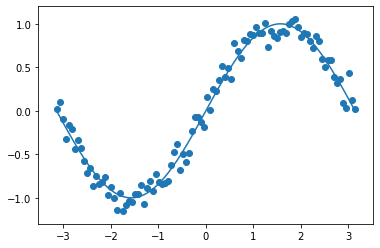

In [3]:
# show
plt.figure()
plt.plot(X, real_y)
plt.scatter(X, y)
plt.show()

# Split train / test dataset

In [4]:
n = N-20

X_train = X_[:n]
y_train = y_[:n]
X_test = X_[n:]
y_test = y_[n:]

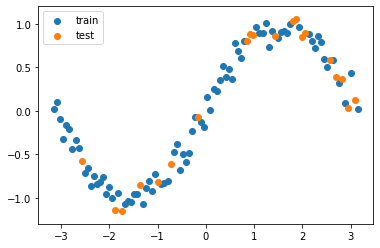

In [5]:
plt.figure()
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

# Multi-layer Linear Regression

## Hyper parameter setting

In [6]:
learning_rate = 1e-1
epochs = 1000

## Make model with pytorch (Gradient Descent)

In [7]:
# prepare data
X_train = torch.tensor(X_train, dtype = torch.float) # if X_train is numpy.array
label = torch.tensor(y_train, dtype = torch.float)

# prepare model
model = nn.Sequential(
        nn.Linear(1,1), #layer 1
        nn.Sigmoid(), #non - linear activation
        nn.Linear(1,1), #layer 2
        )

# prepare optimization and loss function
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1) #lr=hyper parameter

loss_array = []

# train the model
for i in range(epochs): #전체 데이터를 천번 보면서 학습
    optimizer.zero_grad()
    output = model(X_train)
    
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    
X_test = torch.tensor(X_test, dtype = torch.float)
X_ = torch.tensor(X_, dtype = torch.float)

y_train_pred = model(X_train)
y_whole_pred = model(X_)

y_train_pred = y_train_pred.detach().numpy()
y_whole_pred = y_whole_pred.detach().numpy()

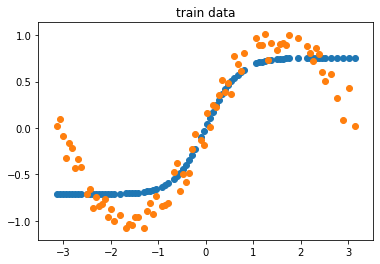

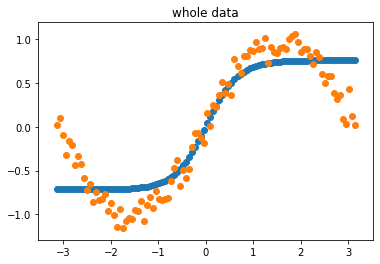

In [8]:
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

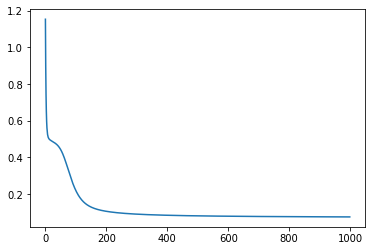

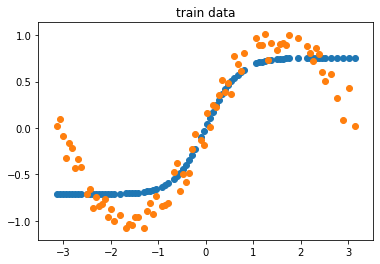

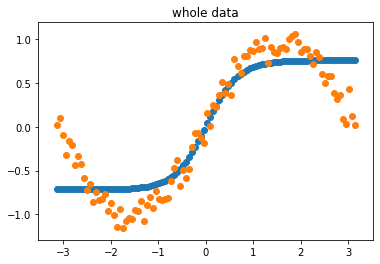

In [9]:
### plot loss
plt.figure()
plt.plot(loss_array)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

# Change hidden layer's node number

In [10]:
# prepare data
X_train = X_train.clone().detach() # if X_train is torch.tensor
label = label.clone().detach()

# prepare model
model = nn.Sequential(
        nn.Linear(1,10),
        nn.Sigmoid(),
        nn.Linear(10,1),
        )

# prepare optimziation and loss function 
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

loss_array = []

# train the model
for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    
X_test = X_test.clone().detach()
X_ = X_.clone().detach()

y_train_pred = model(X_train)
y_whole_pred = model(X_)

y_train_pred = y_train_pred.detach().numpy()
y_whole_pred = y_whole_pred.detach().numpy()

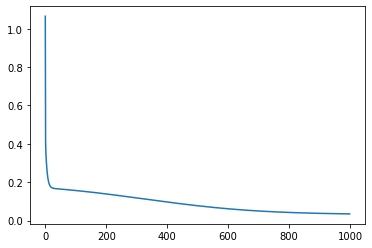

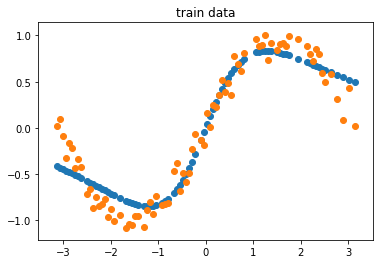

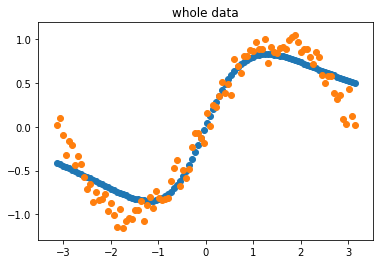

In [11]:
### plot loss
plt.figure()
plt.plot(loss_array)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

# Change Activation function from sigmoid to tanh

In [12]:
# prepare data
X_train = X_train.clone().detach() # if X_train is torch.tensor
label = label.clone().detach()

# prepare model
model = nn.Sequential(
        nn.Linear(1,10),
        nn.Tanh(),
        nn.Linear(10,1),
        )

# prepare optimziation and loss function 
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

loss_array = []

# train the model
for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    
X_test = X_test.clone().detach()
X_ = X_.clone().detach()

y_train_pred = model(X_train)
y_whole_pred = model(X_)

y_train_pred = y_train_pred.detach().numpy()
y_whole_pred = y_whole_pred.detach().numpy()

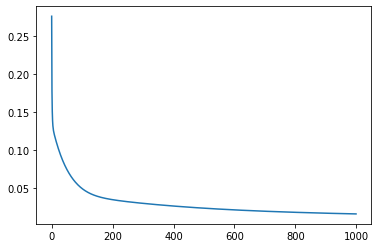

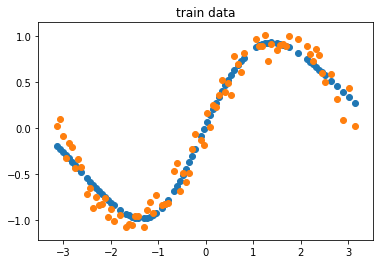

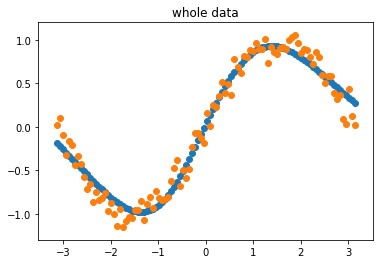

In [13]:
### plot loss
plt.figure()
plt.plot(loss_array)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()

# Sum-up

In [14]:
#################### hyper parameter setting ####################
learning_rate=1e-1
epochs = 1000

h = 10 ### number of hidden layer nodes
act = nn.Tanh() ### activation function
#################################################################
# prepare data
X_train = torch.tensor(X_train, dtype = torch.float)
label = torch.tensor(y_train, dtype = torch.float)

# prepare model
model = nn.Sequential(
        nn.Linear(1,h),
        act,
        nn.Linear(h,1),
        ) #앞에 있는 Matrix의 coulmn과 뒤에 있는 Matrix의 row를 맞춰줘야 한다.

# prepare optimziation and loss function 
loss_function = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr = 0.1)

loss_array = []

# train the model
for i in range(epochs):
    optimizer.zero_grad()
    output = model(X_train)
    
    loss = loss_function(output, label)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)
    
X_test = torch.tensor(X_test, dtype = torch.float)
X_ = torch.tensor(X_, dtype = torch.float)

y_train_pred = model(X_train)
y_whole_pred = model(X_)

y_train_pred = y_train_pred.detach().numpy()
y_whole_pred = y_whole_pred.detach().numpy()

C:\Users\bj shin\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':
C:\Users\bj shin\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
C:\Users\bj shin\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


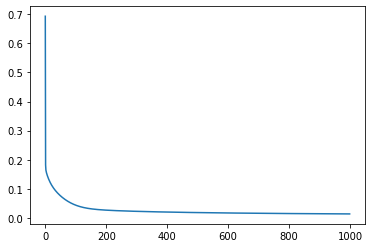

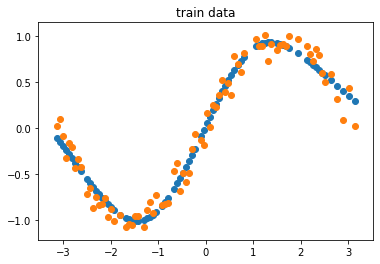

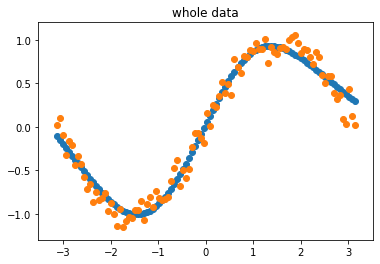

In [15]:
### plot loss
plt.figure()
plt.plot(loss_array)
plt.show()
            
plt.figure()
plt.scatter(X_train, y_train_pred, label='pred')
plt.scatter(X_train, y_train, label='target')
plt.title('train data')
plt.show()

plt.figure()
plt.scatter(X_, y_whole_pred, label='pred')
plt.scatter(X_, y_, label='target')
plt.title('whole data')
plt.show()